# Bitcoin Price Prediction
Linear Regression (Open, High, Low, Volume)


 ### Loading libraries and datasets

In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import math
#plots and graphs
import matplotlib.pyplot as plt
import seaborn as sns
#preparation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#linear regression
from sklearn.linear_model import LinearRegression
#TSA model
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading dataset

df = pd.read_csv("/content/drive/MyDrive/Datasets/Bitcoin Historical Data.csv")

### Data Processing

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 12, 2022","19,994.9","19,963.2","20,026.9","19,794.8",155.09K,0.16%
1,"Jul 11, 2022","19,963.2","20,847.2","20,855.0","19,897.0",160.20K,-4.24%
2,"Jul 10, 2022","20,847.4","21,587.4","21,599.2","20,689.7",204.68K,-3.43%
3,"Jul 09, 2022","21,587.5","21,610.4","21,944.1","21,338.4",190.11K,-0.11%
4,"Jul 08, 2022","21,611.2","21,637.1","22,482.1","21,207.0",439.90K,-0.12%


In [ ]:
df.Date = pd.to_datetime(df.Date)   # changing to datetime

In [ ]:
df = df.rename(columns = {'Vol.':'Vol'})

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol,Change %
0,2022-07-12,"19,994.9","19,963.2","20,026.9","19,794.8",155.09K,0.16%
1,2022-07-11,"19,963.2","20,847.2","20,855.0","19,897.0",160.20K,-4.24%
2,2022-07-10,"20,847.4","21,587.4","21,599.2","20,689.7",204.68K,-3.43%
3,2022-07-09,"21,587.5","21,610.4","21,944.1","21,338.4",190.11K,-0.11%
4,2022-07-08,"21,611.2","21,637.1","22,482.1","21,207.0",439.90K,-0.12%


In [ ]:
print("Shape ", df.shape)
print("______________________________________")
print("Describe ", df.describe())
print("______________________________________")
print("Info ", df.info())

Shape  (1462, 7)
______________________________________
Describe                         Date    Price     Open      High      Low    Vol  \
count                  1462     1462     1462      1462     1462   1462   
unique                 1462     1459     1452      1449     1458   1395   
top     2022-07-12 00:00:00  9,424.8  9,300.5  38,776.0  9,193.9  1.05M   
freq                      1        2        2         2        2      6   
first   2018-07-12 00:00:00      NaN      NaN       NaN      NaN    NaN   
last    2022-07-12 00:00:00      NaN      NaN       NaN      NaN    NaN   

       Change %  
count      1462  
unique      838  
top      -0.50%  
freq          7  
first       NaN  
last        NaN  
______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1462 non-null   datetime64[ns]

In [ ]:
# Checking for missing values

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

          Total  Percent
Date          0      0.0
Price         0      0.0
Open          0      0.0
High          0      0.0
Low           0      0.0
Vol           0      0.0
Change %      0      0.0


In [ ]:
# Cleaning dataset

#converting string to float, replacing commas and characters
price_old=[]
price_new=[]
for i in df.index:
  val=df.iloc[i][1]
  edit_val = val.replace(",", "")
  float_val = float(edit_val)
  price_old.append(val)
  price_new.append(float_val)
df['Price'] = df['Price'].replace(price_old, price_new)

open_old=[]
open_new=[]
for i in df.index:
  val=df.iloc[i][2]
  edit_val = val.replace(",", "")
  float_val = float(edit_val)
  open_old.append(val)
  open_new.append(float_val)
df['Open'] = df['Open'].replace(open_old, open_new)

high_old=[]
high_new=[]
for i in df.index:
  val=df.iloc[i][3]
  edit_val = val.replace(",", "")
  float_val = float(edit_val)
  high_old.append(val)
  high_new.append(float_val)
df['High'] = df['High'].replace(high_old, high_new)

low_old=[]
low_new=[]
for i in df.index:
  val=df.iloc[i][4]
  if 'K' in val:
    edit_val = val.replace('K', '')
    float_val = float(edit_val)
    float_val = float_val*1000
  elif 'M' in val:
    edit_val = val.replace('M', '')
    float_val = float(edit_val)
    float_val = float_val*1000000
  elif 'B' in val:
    edit_val = val.replace('B', '')
    float_val = float(edit_val)
    float_val = float_val*1000000000
  else:
    edit_val = val.replace(",", "")
    float_val = float(edit_val)
  low_old.append(val)
  low_new.append(float_val)
df['Low'] = df['Low'].replace(low_old, low_new)

vol_old=[]
vol_new=[]
for i in df.index:
  val=df.iloc[i][5]
  if 'K' in val:
    edit_val = val.replace('K', '')
    float_val = float(edit_val)
    float_val = float_val*1000
  elif 'M' in val:
    edit_val = val.replace('M', '')
    float_val = float(edit_val)
    float_val = float_val*1000000
  elif 'B' in val:
    edit_val = val.replace('B', '')
    float_val = float(edit_val)
    float_val = float_val*1000000000
  else:
    edit_val = val.replace(",", "")
    float_val = float(edit_val)
  vol_old.append(val)
  vol_new.append(float_val)
df['Vol'] = df['Vol'].replace(vol_old, vol_new)


In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol,Change %
0,2022-07-12,19994.9,19963.2,20026.9,19794.8,155090.0,0.16%
1,2022-07-11,19963.2,20847.2,20855.0,19897.0,160200.0,-4.24%
2,2022-07-10,20847.4,21587.4,21599.2,20689.7,204680.0,-3.43%
3,2022-07-09,21587.5,21610.4,21944.1,21338.4,190110.0,-0.11%
4,2022-07-08,21611.2,21637.1,22482.1,21207.0,439900.0,-0.12%


### Data Visualistion

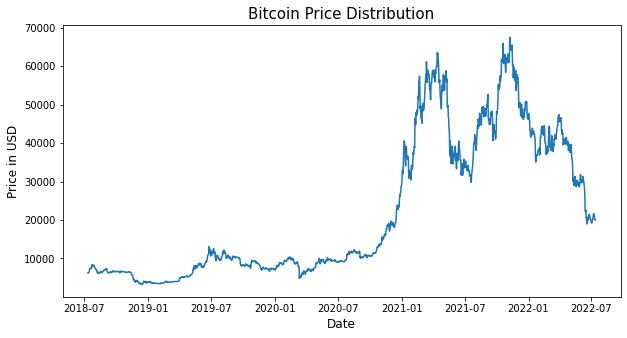

In [ ]:
y_data =df['Price']
x_data = df['Date']
graph_data = df[['Date','Price']]
graph_data = graph_data.set_index('Date')  # Setting the Date as Index
graph_data.sort_index(inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(graph_data)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Bitcoin Price Distribution', fontsize=15)
plt.show()

### Data Splitting

In [ ]:
X = df.iloc[:,[2,3,4,5]]         # defining X(features) and y(label)
y = df.iloc[:, 1]
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1169, 4)
(293, 4)
(1169,)
(293,)


### Validation

In [ ]:
linear_reg_valid = LinearRegression()
kf=KFold(n_splits=5)
score=cross_val_score(linear_reg_valid,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation Score: {}".format(score.mean()))

Cross Validation Scores are [0.99936932 0.99921838 0.99934881 0.99942336 0.99933868]
Average Cross Validation Score: 0.9993397095100505


### Prediction

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print('r2 Score-', r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE- ', rmse)

r2 Score- 0.9993148277684576
RMSE-  487.8520393994167


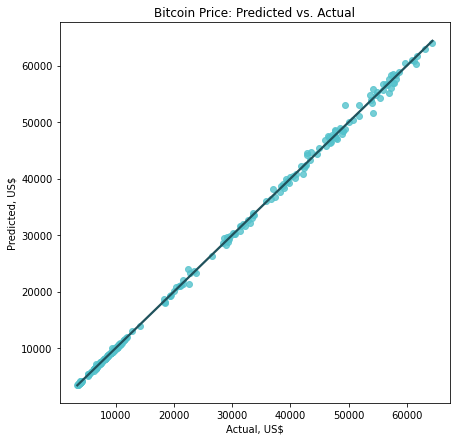

In [ ]:
plt.figure(figsize=(7, 7))
ax = sns.regplot(x = y_test, y = y_pred, data=df, scatter_kws={'color': '#54C2CC'}, line_kws={'color': '#20525C'})
ax.set(xlabel='Actual, US$', ylabel='Predicted, US$', title = 'Bitcoin Price: Predicted vs. Actual')
plt.show()

# Bitcoin Price Prediction
Linear Regression (Open, Volume, NASDAQ Index Price and NFT Index Price)

### Loading dataset

In [ ]:
df_nasdaq = pd.read_csv("/content/drive/MyDrive/Datasets/Nasdaq Index Historical Data.csv")
df_nft = pd.read_csv("/content/drive/MyDrive/Datasets/NFT Index Historical Data.csv")


### Data Processing

In [ ]:
df_nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-13,14715.129883,14803.679688,14660.190430,14677.650391,14677.650391,4553380000
1,2021-07-14,14780.900391,14790.549805,14632.950195,14644.950195,14644.950195,4461730000
2,2021-07-15,14635.780273,14650.370117,14451.799805,14543.129883,14543.129883,4493540000
3,2021-07-16,14597.509766,14623.019531,14413.320313,14427.240234,14427.240234,4048940000
4,2021-07-19,14235.980469,14313.599609,14178.660156,14274.980469,14274.980469,4507040000


In [ ]:
df_nft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-13,623.343201,650.161438,601.914978,635.768860,635.768860,20016.0
1,2021-07-14,636.335083,704.484375,614.385986,699.971436,699.971436,12462.0
2,2021-07-15,700.016846,750.534363,665.987793,668.401733,668.401733,10994.0
3,2021-07-16,668.019226,682.566223,618.702942,620.450928,620.450928,3717.0
4,2021-07-17,620.032288,624.419556,559.951355,585.281433,585.281433,14773.0


In [ ]:
print("Shape ", df_nasdaq.shape)
print("______________________________________")
print("Describe ", df_nasdaq.describe())
print("______________________________________")
print("Info ", df_nasdaq.info())

Shape  (252, 7)
______________________________________
Describe                 Open          High           Low         Close     Adj Close  \
count    252.000000    252.000000    252.000000    252.000000    252.000000   
mean   14042.259115  14159.102462  13901.178781  14032.271729  14032.271729   
std     1447.080842   1417.385319   1467.981671   1445.934360   1445.934360   
min    10697.549805  10831.070313  10565.139648  10646.099609  10646.099609   
25%    13291.772705  13433.657471  13022.177490  13235.324952  13235.324952   
50%    14522.959961  14616.889649  14416.360352  14500.395019  14500.395019   
75%    15141.052246  15207.985108  15012.442627  15123.532227  15123.532227   
max    16120.919922  16212.230469  16017.230469  16057.440430  16057.440430   

             Volume  
count  2.520000e+02  
mean   4.856040e+09  
std    8.297731e+08  
min    3.379850e+09  
25%    4.272835e+09  
50%    4.716250e+09  
75%    5.281698e+09  
max    9.438810e+09  
_________________________

In [ ]:
df_nasdaq.Date = pd.to_datetime(df_nasdaq.Date)
df_nft.Date = pd.to_datetime(df_nft.Date)

In [ ]:
# Selecting the date range

start_date = '12-Jul-2021'
end_date = '11-Jul-2022'

data_bitcoin = df.loc[df['Date'] >= start_date].copy()
data_bitcoin = data_bitcoin.loc[data_bitcoin['Date'] <= end_date]
data_nasdaq = df_nasdaq.loc[df_nasdaq['Date'] >= start_date].copy()
data_nasdaq = data_nasdaq.loc[data_nasdaq['Date'] <= end_date]
data_nft = df_nft.loc[df_nft['Date'] >= start_date].copy()
data_nft = data_nft.loc[data_nft['Date'] <= end_date]

print(data_nasdaq.head())
print(data_nft.head())

        Date          Open          High           Low         Close  \
0 2021-07-13  14715.129883  14803.679688  14660.190430  14677.650391   
1 2021-07-14  14780.900391  14790.549805  14632.950195  14644.950195   
2 2021-07-15  14635.780273  14650.370117  14451.799805  14543.129883   
3 2021-07-16  14597.509766  14623.019531  14413.320313  14427.240234   
4 2021-07-19  14235.980469  14313.599609  14178.660156  14274.980469   

      Adj Close      Volume  
0  14677.650391  4553380000  
1  14644.950195  4461730000  
2  14543.129883  4493540000  
3  14427.240234  4048940000  
4  14274.980469  4507040000  
        Date        Open        High         Low       Close   Adj Close  \
0 2021-07-13  623.343201  650.161438  601.914978  635.768860  635.768860   
1 2021-07-14  636.335083  704.484375  614.385986  699.971436  699.971436   
2 2021-07-15  700.016846  750.534363  665.987793  668.401733  668.401733   
3 2021-07-16  668.019226  682.566223  618.702942  620.450928  620.450928   
4 2021-

In [ ]:
# Adding to new dataset

df_bitcoin = data_bitcoin
df_bitcoin['Nasdaq Index'] = data_nasdaq['Close']
df_bitcoin['NFT Index'] = data_nft['Close']

In [ ]:
df_bitcoin.head()

,Date,Price,Open,High,Low,Vol,Change %,Nasdaq Index,NFT Index
1,2022-07-11,19963.2,20847.2,20855.0,19897.0,160200.0,-4.24%,14644.950195,699.971436
2,2022-07-10,20847.4,21587.4,21599.2,20689.7,204680.0,-3.43%,14543.129883,668.401733
3,2022-07-09,21587.5,21610.4,21944.1,21338.4,190110.0,-0.11%,14427.240234,620.450928
4,2022-07-08,21611.2,21637.1,22482.1,21207.0,439900.0,-0.12%,14274.980469,585.281433
5,2022-07-07,21637.8,20557.9,21817.8,20282.7,115810.0,5.24%,14498.879883,588.493835


In [ ]:
# Checking for missing values

total = df_bitcoin.isnull().sum().sort_values(ascending=False)
percent = (df_bitcoin.isnull().sum()/df_bitcoin.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

              Total   Percent
Nasdaq Index    115  0.315068
NFT Index         2  0.005479
Date              0  0.000000
Price             0  0.000000
Open              0  0.000000
High              0  0.000000
Low               0  0.000000
Vol               0  0.000000
Change %          0  0.000000


In [ ]:
df_bitcoin = df_bitcoin.dropna()    # dropping missing values

In [ ]:
df_bitcoin.head()

,Date,Price,Open,High,Low,Vol,Change %,Nasdaq Index,NFT Index
1,2022-07-11,19963.2,20847.2,20855.0,19897.0,160200.0,-4.24%,14644.950195,699.971436
2,2022-07-10,20847.4,21587.4,21599.2,20689.7,204680.0,-3.43%,14543.129883,668.401733
3,2022-07-09,21587.5,21610.4,21944.1,21338.4,190110.0,-0.11%,14427.240234,620.450928
4,2022-07-08,21611.2,21637.1,22482.1,21207.0,439900.0,-0.12%,14274.980469,585.281433
5,2022-07-07,21637.8,20557.9,21817.8,20282.7,115810.0,5.24%,14498.879883,588.493835


### Data Visualization

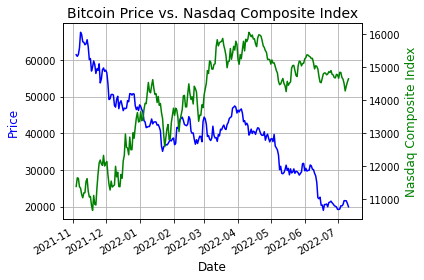

In [ ]:
x = pd.Series(df_bitcoin['Date'])
y1 = pd.Series(df_bitcoin['Price'])
y2 = pd.Series(df_bitcoin['Nasdaq Index'])
fig, ax = plt.subplots()
ax = plt.gca()
ax1 = ax.twinx()
plt.axis('normal')
ax.plot(x, y1, 'b',linewidth=1.5)
ax1.plot(x, y2, 'g',linewidth=1.5)
ax.set_ylabel("Price", fontsize=12, color='blue')
ax1.set_ylabel("Nasdaq Composite Index", fontsize=12, color='green')
ax.grid(True)
plt.title("Bitcoin Price vs. Nasdaq Composite Index", fontsize=14, color='black')
ax.set_xlabel('Date', fontsize=12, color='black')
fig.autofmt_xdate()
plt.tight_layout()
# plt.savefig('charts/nasdaq.png')
plt.show()


### Data Splitting

In [ ]:
X_data = df_bitcoin.iloc[:,[2,5,7,8]]         # defining X(features) and y(label)
y_data = df_bitcoin.iloc[:, 1]
# splitting X and y into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X_data, y_data, test_size=0.20, random_state=0)

In [ ]:
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(200, 4)
(50, 4)
(200,)
(50,)


### Prediction

In [ ]:
linearReg = LinearRegression()
linearReg.fit(XTrain, yTrain)
yPred = linearReg.predict(XTest)

In [ ]:
r2 = r2_score(yTest, yPred)
print('r2 Score-', r2)
rmse = np.sqrt(mean_squared_error(yTest, yPred))
print('RMSE- ', rmse)

r2 Score- 0.9744745796334477
RMSE-  1369.7897356510002


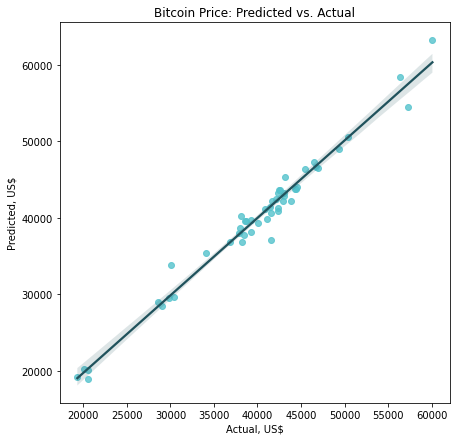

In [ ]:
plt.figure(figsize=(7, 7))
ax = sns.regplot(x = yTest, y = yPred, data=df_bitcoin, scatter_kws={'color': '#54C2CC'}, line_kws={'color': '#20525C'})
ax.set(xlabel='Actual, US$', ylabel='Predicted, US$', title = 'Bitcoin Price: Predicted vs. Actual')
plt.show()

# Bitcoin Price Prediction
Time Series Analysis  

### Loading dataset

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
df_yf = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_yf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### Data Splitting

In [ ]:
# splitting into testing and training dataset
to_row = int(len(df_yf)*0.9)
training_data = list(df_yf[0:to_row]['Adj Close'])
testing_data = list(df_yf[to_row:]['Adj Close'])

In [ ]:
print(len(training_data))
print(len(testing_data))

2572
286


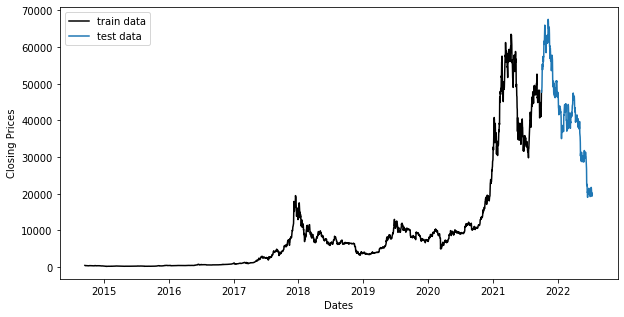

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_yf[0:to_row]['Adj Close'], 'black', label = 'train data')
plt.plot(df_yf[to_row:]['Adj Close'], label = 'test data')
plt.legend()
plt.show()

### Prediction  

In [ ]:
model_predictions = []
n_test_obs = len(testing_data)

In [ ]:
for i in range(n_test_obs):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  y_hat = list(output[0])[0]
  model_predictions.append(y_hat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2856
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -23162.111
Method:                       css-mle   S.D. of innovations            805.162
Date:                Thu, 14 Jul 2022   AIC                          46336.223
Time:                        06:57:00   BIC                          46371.966
Sample:                             1   HQIC                         46349.112
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9169     15.614      0.443      0.658     -23.686      37.520
ar.L1.D.y     -0.0274      0.019     -1.468      0.142      -0.064       0.009
ar.L2.D.y      0.0050      0.019      0.266      0.7

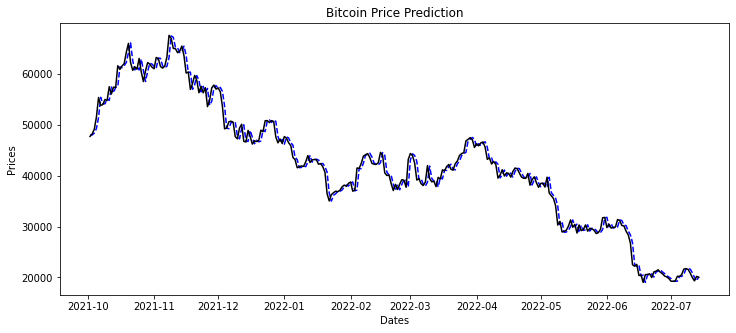

In [ ]:
plt.figure(figsize=(12, 5))
date_range = df_yf[to_row:].index
plt.plot(date_range, model_predictions, color = 'blue',
         linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color = 'black', label = 'BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

In [ ]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))
print('MAPE- ', str(mape))
rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print('RMSE- ', rmse)

MAPE-  0.02583677732805404
RMSE-  1463.8493502150602
